# Project: No show appointments Investigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
> #### Questions:
> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?<br>
What is the precentage of patients who miss there appointment?<br>

In [49]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
# including magic word so visualization are plotted inline
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [50]:
# loading the csv file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# printing with head function to make sure things work
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [25]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df = df.query('Age <= 100')

In [26]:
df = df.rename(columns = {'No-show':'No_show'})

In [27]:
def change(text):
    if text == 'No':
        return 0
    return 1

df['No_show'] = df['No_show'].apply(change)

In [28]:
df['AppointmentDay'] = pd.to_datetime(df.AppointmentDay)
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay              object
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No_show                    int64
dtype: object

In [29]:
df.AppointmentDay.min() , df.AppointmentDay.max()

(Timestamp('2016-04-29 00:00:00'), Timestamp('2016-06-08 00:00:00'))

In [30]:
df['day_of_week'] = df.AppointmentDay.dt.day_name()

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [31]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_grouped = df.groupby('No_show')
df_grouped.agg(np.mean)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No_show,,,,,,,,,
0,1.476713e+14,5.681135e+06,37.786858,0.093907,0.204390,0.07384,0.030418,0.022731,0.291336
1,1.467677e+14,5.652258e+06,34.306820,0.115522,0.169027,0.06408,0.030337,0.020165,0.438430


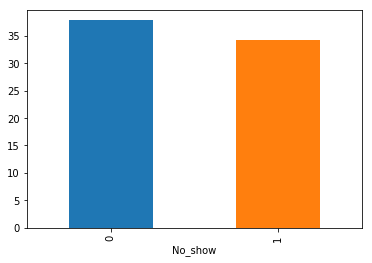

In [32]:
df_grouped['Age'].agg(np.mean).plot(kind='bar');

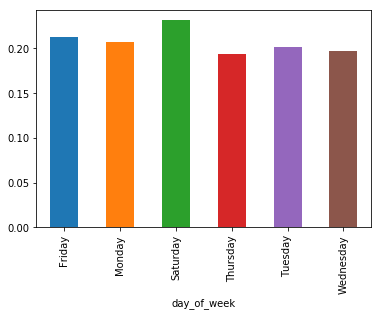

In [33]:
df.groupby('day_of_week')['No_show'].mean().plot(kind='bar');

In [48]:
df.groupby('day_of_week').size()

day_of_week
Friday       19018
Monday       22713
Saturday        39
Thursday     17244
Tuesday      25639
Wednesday    25867
dtype: int64

array([0, 1, 2, 3, 4])

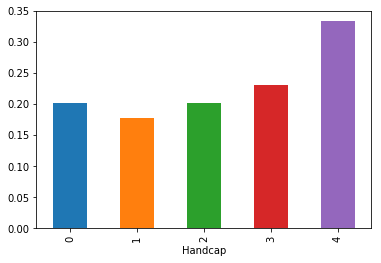

In [46]:
df.groupby('day_')

### What is the precentage of patients who miss there appointment ?

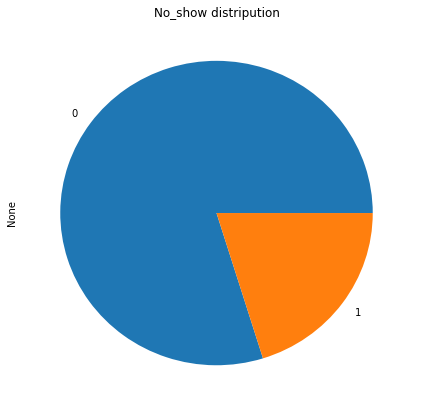

In [34]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.groupby('No_show').size().plot(kind='pie', title='No_show distripution', figsize=(7,7));

In [35]:
df.No_show.mean()

0.20191820484980094

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!